# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [27]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [29]:
print(data.shape)

(891, 14)


**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [4]:
print(data.head(5))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

**Вывести описательную статистику**

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [6]:
 print(data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [11]:
print(data.groupby('Pclass').agg({'Survived': 'mean'}).reset_index())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [8]:
print(data.groupby('Sex').agg({'Survived': 'mean'}).reset_index())

      Sex  Survived
0  female  0.742038
1    male  0.188908


**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [9]:
data['male'] = data['Sex'] == 'male' #добавим столбцы для м и ж
data['male'] = data['male'].astype(int) 

data['female'] = data['Sex'] == "female"
data['female'] = data['female'].astype(int)
print(data.groupby('Pclass').agg({'male': 'sum', 'female': 'sum'}).reset_index())

   Pclass  male  female
0       1   122      94
1       2   108      76
2       3   347     144


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [10]:
filter = (data['Embarked'].isin(['C'])) & (data['Fare'] > 200)

sorted_data = data[filter]
print(sorted_data.sort_values(by='Fare', ascending=False))

             Survived  Pclass  \
PassengerId                     
259                 1       1   
680                 1       1   
738                 1       1   
312                 1       1   
743                 1       1   
119                 0       1   
300                 1       1   
381                 1       1   
558                 0       1   
701                 1       1   
717                 1       1   
378                 0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
259                                           Ward, Miss. Anna  female  35.0   
680                         Cardeza, Mr. Thomas Drake Martinez    male  36.0   
738                                     Lesurer, Mr. Gustave J    male  35.0   
312                                 Ryerson, Miss. Emily Borie  female  18.0   
743                      Ryerson, Miss. Susan Parker "Suz

**Создать категориальный признак для заданных градаций возраста пассажира.**

In [16]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    data['age_category'] = (data[age] >= 30).astype(int) + (data[age] > 55).astype(int) + 1

In [17]:
age_category('Age')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female,age_category
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,2


**Определить, сколько мужчин / женщин находилось на борту?**

In [37]:
print(data.agg({"male":"sum", "female":"sum"}))

male      577
female    314
dtype: int64


**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

мужчины 2го класса: 108


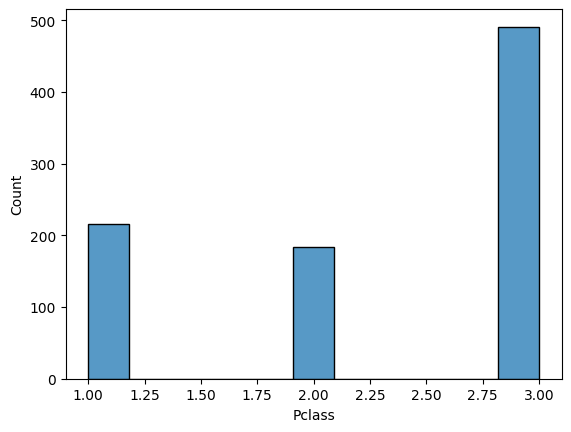

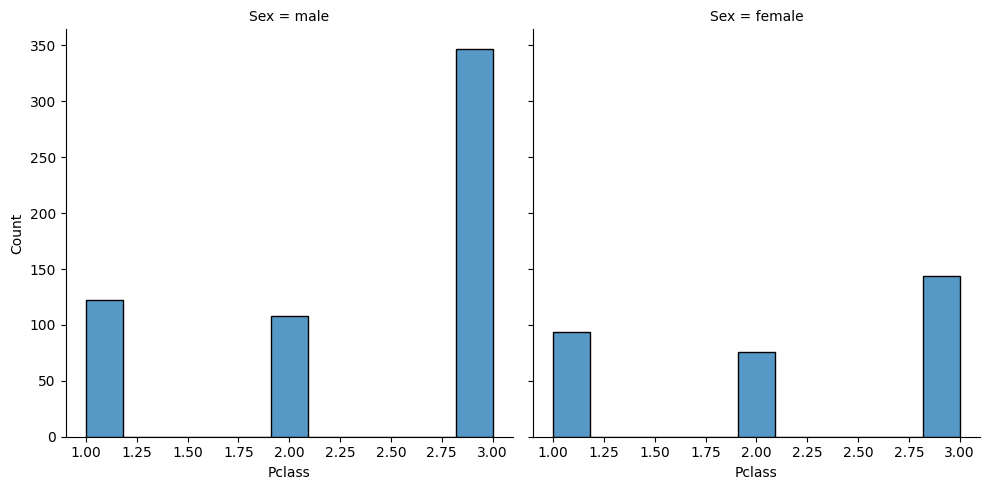

In [18]:
import seaborn as sea

sea.histplot(data['Pclass']) #гистограмма для классов
sea.displot(data=data, x='Pclass', col='Sex') #гистограмма для полов
print('мужчины 2го класса:', len(data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]))

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [42]:
survivor_class_data = data.groupby('Pclass').agg({'Survived':'sum'})

trd_class = round(survivor_class_data['Survived'][3] / len(data), 3)
fst_class= round(survivor_class_data['Survived'][1] / len(data), 3)
print(f'доля выживших 3го класса: {trd_class}, доля выживших 1го класса: {fst_class}')

доля выживших 3го класса: 0.134, доля выживших 1го класса: 0.153


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [43]:
median = round(data['Fare'].quantile(0.5), 2)
std = round(data['Fare'].std(), 2)
print(f'медиана: {median}, стандартное отклонение: {std}')

медиана: 14.45, стандартное отклонение: 49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [46]:
young = data[data['Age'] < 30].agg({'Survived': 'mean'})['Survived']
old = data[data['Age'] > 60].agg({'Survived': 'mean'})['Survived']

print(f'молодые выживают чаще: {young > old}')
print(f'доля выживших среди молодых: {round(young, 2)}, среди старых: {round(old, 2)}')

молодые выживают чаще: True
доля выживших среди молодых: 0.41, среди старых: 0.23


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [47]:
women = data[data['Sex'] == 'female'].agg({'Survived': 'mean'})['Survived']
men = data[data['Sex'] == 'male'].agg({'Survived': 'mean'})['Survived']

print(f'женщины выживают чаще: {women > men}')
print(f'доля выживших среди женщин: {round(women, 2)}, среди мужчин: {round(men, 2)}')

женщины выживают чаще: True
доля выживших среди женщин: 0.74, среди мужчин: 0.19


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [50]:
#список уникальных мужских имен и частоту их встречаемости
male_names = data[data['Sex'] == 'male']['Name'].str.split().str[2] #2 потому что нужно третье значение - имя
male_name_frequencies = male_names.value_counts()

max_count = male_name_frequencies.max()
print(male_name_frequencies[male_name_frequencies == max_count])

Name
William    35
Name: count, dtype: int64


**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [51]:
print(data[data['Sex'] == 'male'].groupby('Pclass').agg({'Age':'mean'}))
print(data[data['Sex'] == 'female'].groupby('Pclass').agg({'Age':'mean'}))

              Age
Pclass           
1       41.281386
2       30.740707
3       26.507589
              Age
Pclass           
1       34.611765
2       28.722973
3       21.750000


**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

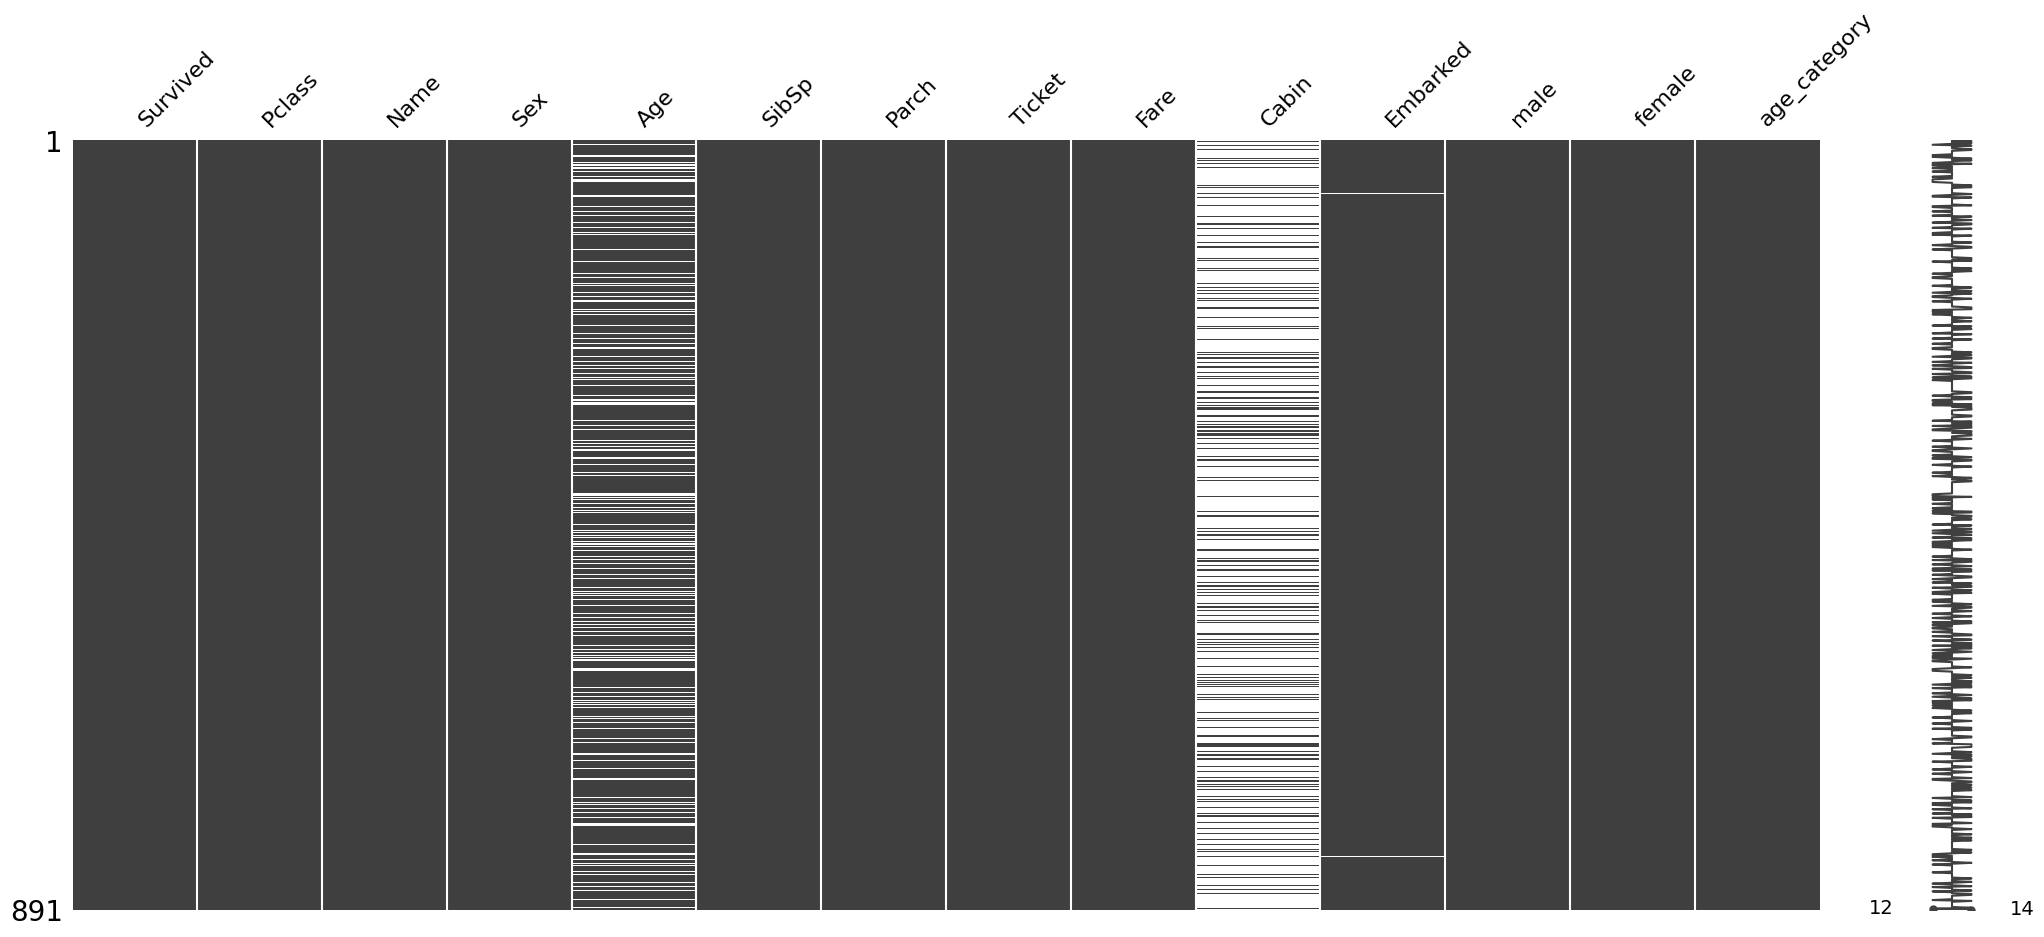

In [20]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

<Axes: >

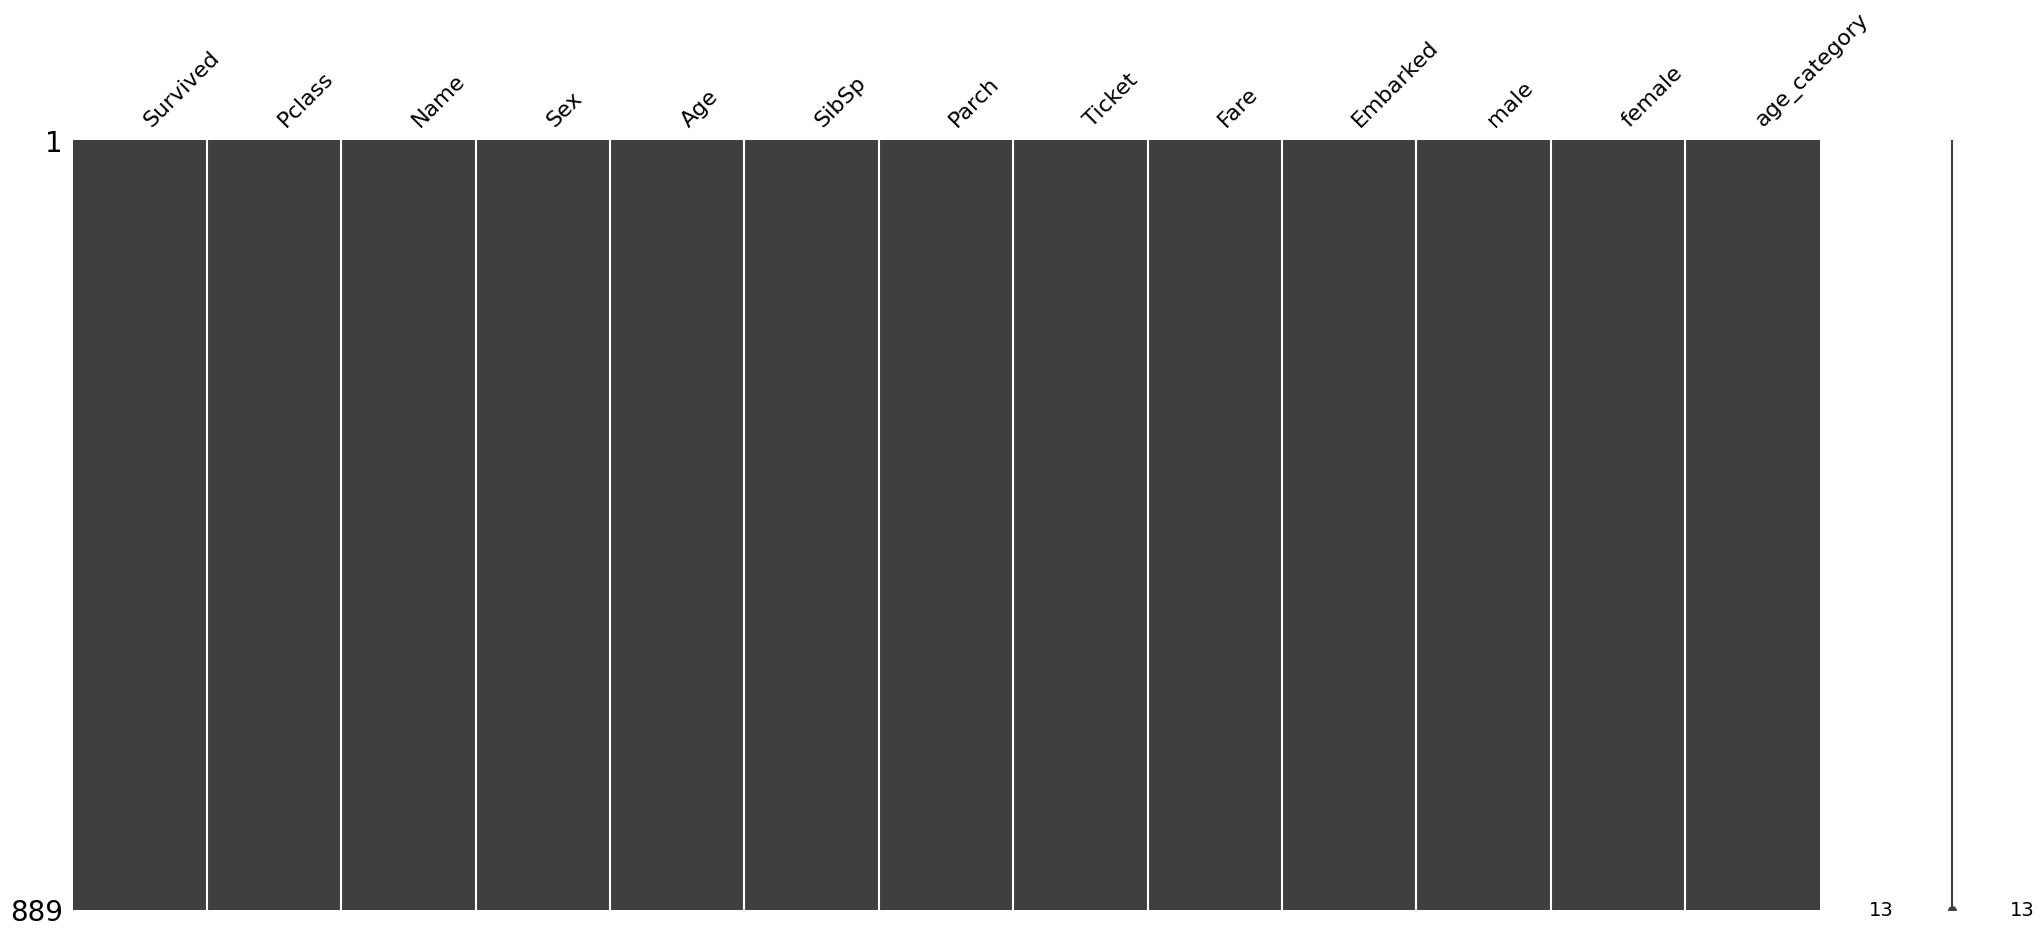

In [21]:
new_data = data.copy(deep=True)

new_data = new_data.drop(['Cabin'], axis=1)

median = new_data['Age'].quantile(0.5)
new_data['Age'] = [median for i in range(len(new_data))]

new_data.dropna(how='any', inplace=True) #удалить строки с пропущенными значениями

missingno.matrix(new_data)

**Для категориальных переменных построить столбчатую диаграмму**

<Axes: xlabel='Embarked', ylabel='Count'>

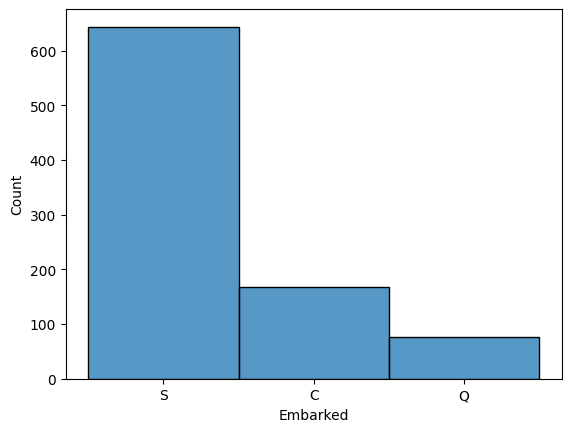

In [56]:
sea.histplot(data['Embarked'])

**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='male', ylabel='Survived'>,
        <Axes: xlabel='female', ylabel='Survived'>,
        <Axes: xlabel='age_category', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='male', ylabel='Pclass'>,
        <Axes: xlabel='female', ylabel='Pclass'>,
        <Axes: xlabel='age_category', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', y

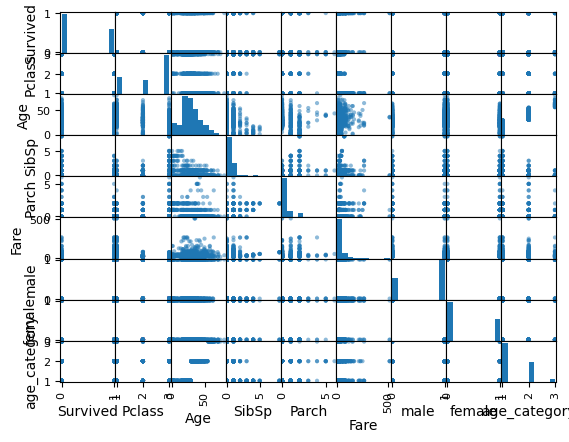

In [22]:
copied_data = data.copy(deep=True)

#copied_data.drop(['Sex'], axis=1, inplace=True)

pd.plotting.scatter_matrix(copied_data)

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare'>

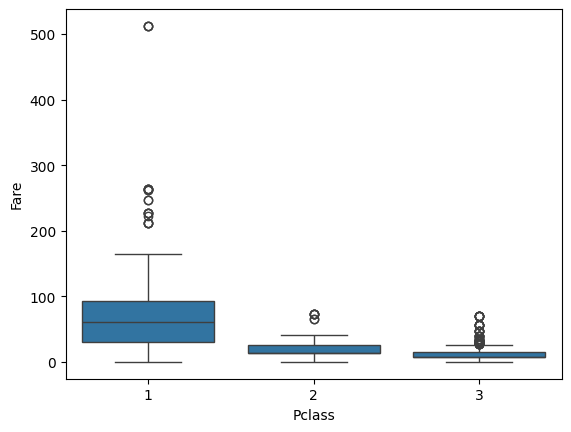

In [64]:
sea.boxplot(x='Pclass', y='Fare', data=data)

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare_no_out'>

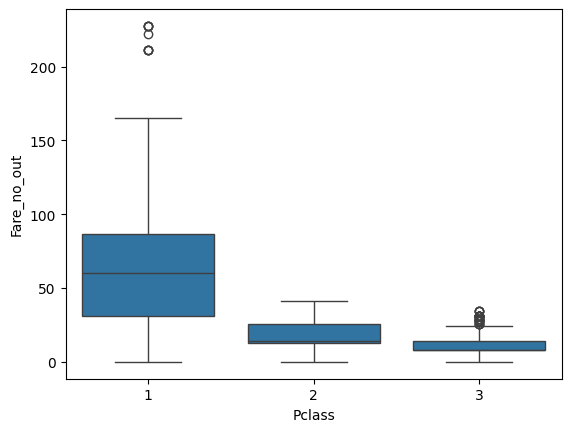

In [68]:

train_df = data.copy()
train_df['Fare_no_out'] = train_df['Fare']

def process_class_fare(fare_class):
    mean_fare = fare_class.mean()
    std_fare = fare_class.std()
    # оставляем только значения, не превышающие двойное стандартное отклонение от среднего
    return fare_class.where((fare_class - mean_fare) < 2 * std_fare, mean_fare)

fare_pclass1_no_out = process_class_fare(train_df[train_df['Pclass'] == 1]['Fare'])
fare_pclass2_no_out = process_class_fare(train_df[train_df['Pclass'] == 2]['Fare'])
fare_pclass3_no_out = process_class_fare(train_df[train_df['Pclass'] == 3]['Fare'])

train_df.loc[train_df['Pclass'] == 1, 'Fare_no_out'] = fare_pclass1_no_out
train_df.loc[train_df['Pclass'] == 2, 'Fare_no_out'] = fare_pclass2_no_out
train_df.loc[train_df['Pclass'] == 3, 'Fare_no_out'] = fare_pclass3_no_out

sea.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

<Axes: xlabel='Sex', ylabel='percent'>

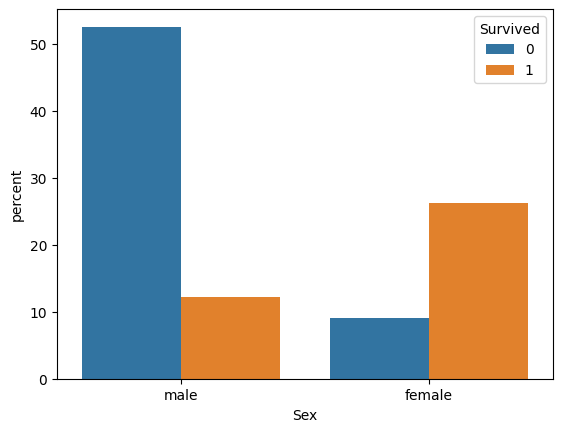

In [69]:
sea.countplot(data, x='Sex', hue='Survived', stat='percent')

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

<Axes: xlabel='Pclass', ylabel='percent'>

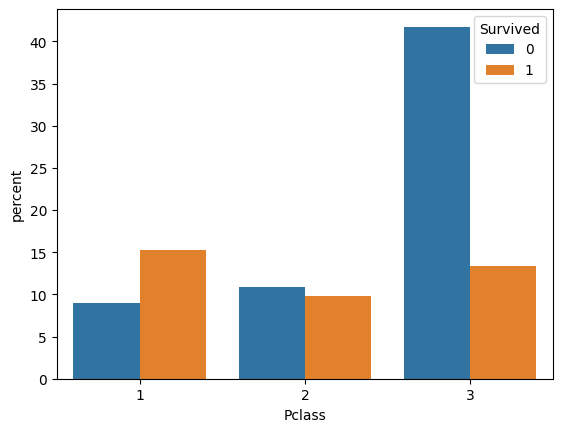

In [70]:
sea.countplot(data, x='Pclass', hue='Survived', stat='percent')

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

<Axes: xlabel='age_category', ylabel='percent'>

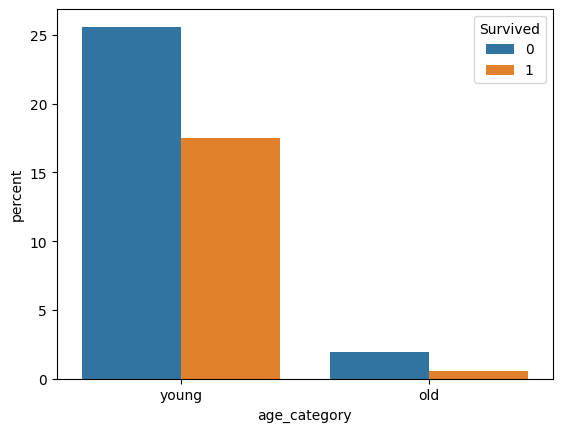

In [36]:
def ages(row):
    if row.Age < 30:
        return "young"
    elif row.Age > 60:
        return "old"

copy_data = data.copy(deep=True)
copy_data.drop(["age_category"], axis=1, inplace=True)

copy_data["age_category"] = (copy_data["Age"] > 60).astype(int) + (copy_data["Age"] < 30).astype(int)

age = copy_data.apply(ages, axis="columns")

copy_data["age_category"] = age
sea.countplot(copy_data, x="age_category", hue="Survived", stat="percent")

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

In [26]:
copy_data = data.copy(deep=True)

corr = copy_data.corr(numeric_only=True) #рассматриваем только числовые признаки

m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any() #true если кор-я >0.5, создать единичную матрицу с размером соответствующим corr

raw = corr.loc[m, m] # оставить только те строки где маска true
raw

,Survived,Pclass,Age,Fare,male,female,age_category
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.543351,0.543351,0.015926
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.131900,-0.131900,-0.349800
Age,-0.077221,-0.369226,1.000000,0.096067,0.093254,-0.093254,0.857987
Fare,0.257307,-0.549500,0.096067,1.000000,-0.182333,0.182333,0.135882
male,-0.543351,0.131900,0.093254,-0.182333,1.000000,-1.000000,0.030116
female,0.543351,-0.131900,-0.093254,0.182333,-1.000000,1.000000,-0.030116
age_category,0.015926,-0.349800,0.857987,0.135882,0.030116,-0.030116,1.000000
